In [1]:
#pip install -U scikit-learn

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import sklearn as sk
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import sklearn as sk
import seaborn as sns

import warnings
warnings.filterwarnings("ignore")
from scipy import interp
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import MinMaxScaler
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import StratifiedKFold
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import (auc, roc_curve, 
                             precision_recall_curve, 
                             average_precision_score)
%config InlineBackend.figure_format = 'svg'
sns.set_style('whitegrid')

df = pd.read_csv(r'titanic3.csv', sep=';')

# 1. Изучить набор данных. Создать описание набора данных на русском языке. Описать признаки, используемые в наборе данных (включить полученные описания в отчёт)

In [3]:
tabledata = [["pclass", "класс билета", "1 - 1 класс; 2 - 2 класс; 3 - 3 класс"],
             ["survived", "выживание", "0 - Нет ;1 - Да"],
             ["name", "имя", "любой"],
             ["sex", "пол", "female - женский, male - мужской"],
             ["age", "возраст", "числовой"],
             ["sibsp", "число братьев, сестер, супругов на борту", "числовой"],
             ["parch", "число родителей, детей на ботру", "числовой"], 
             ["ticket", "номер билета", "любой"],
             ["fare", "цена билета", "числовой"],
             ["cabin", "номер каюты", "любой"],
             ["embarked", "порт погрузки", "C = Cherbourg, Q = Queenstown, S = Southampton"],
             ["boat", "номер спасательной шлюпки", "любой"],
             ["body", "идентификационный номер тела", "числовой"],
             ["home.dest", "Дом/Назначение", "любой"],]
tabledata
pd.DataFrame(tabledata, columns=["Переменная","Описание", "Параметры(Ключи)"])

,Переменная,Описание,Параметры(Ключи)
0,pclass,класс билета,1 - 1 класс; 2 - 2 класс; 3 - 3 класс
1,survived,выживание,0 - Нет ;1 - Да
2,name,имя,любой
3,sex,пол,"female - женский, male - мужской"
4,age,возраст,числовой
5,sibsp,"число братьев, сестер, супругов на борту",числовой
6,parch,"число родителей, детей на ботру",числовой
7,ticket,номер билета,любой
8,fare,цена билета,числовой
9,cabin,номер каюты,любой


In [4]:
df.head()

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest
0,1.0,1.0,"Allen, Miss. Elisabeth Walton",female,29,0.0,0.0,24160,"211,3375",B5,S,2,NaN,"St Louis, MO"
1,1.0,1.0,"Allison, Master. Hudson Trevor",male,"0,9167",1.0,2.0,113781,"151,5500",C22 C26,S,11,NaN,"Montreal, PQ / Chesterville, ON"
2,1.0,0.0,"Allison, Miss. Helen Loraine",female,2,1.0,2.0,113781,"151,5500",C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"
3,1.0,0.0,"Allison, Mr. Hudson Joshua Creighton",male,30,1.0,2.0,113781,"151,5500",C22 C26,S,NaN,135.0,"Montreal, PQ / Chesterville, ON"
4,1.0,0.0,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25,1.0,2.0,113781,"151,5500",C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"


# 2. Удалите дубликаты строк в наборе данных; приведите размер набора данных до и после данной операции

In [5]:
df.shape

(1310, 14)

In [6]:
df = df.drop_duplicates()
df.shape

(1310, 14)

In [7]:
df.head()

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest
0,1.0,1.0,"Allen, Miss. Elisabeth Walton",female,29,0.0,0.0,24160,"211,3375",B5,S,2,NaN,"St Louis, MO"
1,1.0,1.0,"Allison, Master. Hudson Trevor",male,"0,9167",1.0,2.0,113781,"151,5500",C22 C26,S,11,NaN,"Montreal, PQ / Chesterville, ON"
2,1.0,0.0,"Allison, Miss. Helen Loraine",female,2,1.0,2.0,113781,"151,5500",C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"
3,1.0,0.0,"Allison, Mr. Hudson Joshua Creighton",male,30,1.0,2.0,113781,"151,5500",C22 C26,S,NaN,135.0,"Montreal, PQ / Chesterville, ON"
4,1.0,0.0,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25,1.0,2.0,113781,"151,5500",C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"


# 3. Оцените сбалансированность данных по классам (постройте гистограмму). Используйте полученную информацию при выборе метрики оценки качества классификации (PR или ROC кривая)

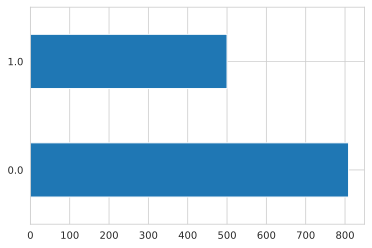

In [8]:
df['survived'].value_counts().plot(kind='barh')

Соотношение количество элементов отличается,значит классы несбалансированны. Будем использовать ROC-кривую, т.к. она дает адекватную оценку качества работы алгоритма, где классы несбалансированны и их размеры выборки отличаются друг от друга.

# 4. Выполните масштабирование количественных признаков; Постройте диаграммы BoxPlot для признаков до и после масштабирования. Выберите способ масштабирования (например, нормализацию или стандартизацию)

In [9]:
list_to_drop = ['body', 'boat', 'name', 'cabin', 'ticket', 'home.dest']
df.drop(list_to_drop, axis=1, inplace=True)
def change(obj):
    if type(obj) == str:
        return float(obj.replace(',', '.'))
    else:
        return obj
df['age'] = df['age'].apply(lambda x: change(x))
df['fare'] = df['fare'].apply(lambda x: change(x))
df['pclass'] = df['pclass'].apply(lambda x: change(x))

numerical_columns = [i for i in df.columns if df[i].dtype.name != 'object']
categorial_columns = [i for i in df.columns if df[i].dtype.name == 'object']
print('numerical: ', numerical_columns)
print('categorial: ', categorial_columns)

numerical:  ['pclass', 'survived', 'age', 'sibsp', 'parch', 'fare']
categorial:  ['sex', 'embarked']


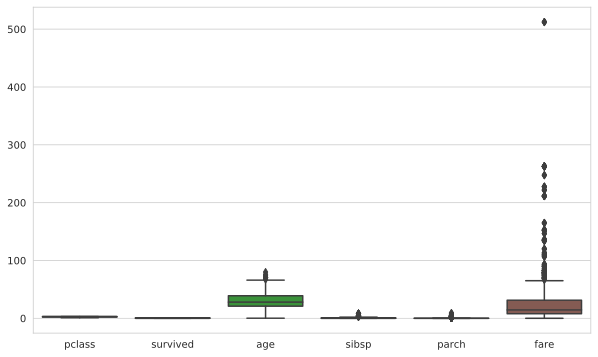

In [10]:
plt.figure(figsize=(10,6))
sns.boxplot(data=df[numerical_columns])
plt.show()

Способ маштабирования - нормализация

In [11]:
# заполним пропущенные значения параметра age медианными
df['age'] = df['age'].fillna(df['age'].median())
df = df.dropna().reset_index(drop=True)
scaler = MinMaxScaler()
df[numerical_columns] = scaler.fit_transform(df[numerical_columns])
df.head()

,pclass,survived,sex,age,sibsp,parch,fare,embarked
0,0.0,1.0,female,0.361169,0.000,0.000000,0.412503,S
1,0.0,1.0,male,0.009395,0.125,0.222222,0.295806,S
2,0.0,0.0,female,0.022964,0.125,0.222222,0.295806,S
3,0.0,0.0,male,0.373695,0.125,0.222222,0.295806,S
4,0.0,0.0,female,0.311064,0.125,0.222222,0.295806,S


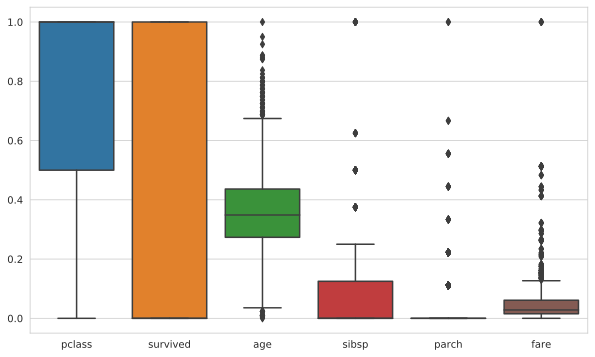

In [12]:
plt.figure(figsize=(10,6))
sns.boxplot(data=df[numerical_columns])
plt.show()

# 5. Выполните замену категориальных признаков

In [13]:

for i in categorial_columns:
    print(i,': ', df[i].unique())

# выделим бинарные и небинарные признаки
binary_columns = [i for i in categorial_columns if len(df[i].unique()) == 2]
nonbinary_columns = [i for i in categorial_columns if len(df[i].unique()) > 2]
for i in binary_columns:
    print('binary_columns:  '+i)
    
# для бинарных заменим значения на 1 и 0
for col in binary_columns:
    for i, unic_item in enumerate(df[col].unique()):
        df[col] = df[col].replace(to_replace=[unic_item], value=[i])
        
# для не бинарых применим dummy-кодирование
df_nonbinary = pd.get_dummies(df[nonbinary_columns])
df.drop(nonbinary_columns, axis=1, inplace=True)
df = pd.concat([df_nonbinary, df] , axis=1)

print(df.shape)

sex :  ['female' 'male']
embarked :  ['S' 'C' 'Q']
binary_columns:  sex
(1306, 10)


# 6. Оцените корреляцию между признаков и удалите те признаки, которые коррелируют с наибольшим числом других(для линейных)

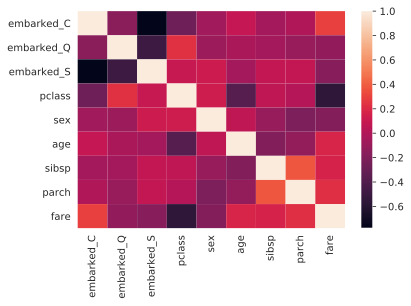

In [14]:
df_corr = df.drop('survived', axis=1).corr()
sns.heatmap(df_corr)
plt.show()

In [15]:
df_corr

,embarked_C,embarked_Q,embarked_S,pclass,sex,age,sibsp,parch,fare
embarked_C,1.000000,-0.164612,-0.778110,-0.271187,-0.067451,0.077591,-0.048985,-0.009161,0.287211
embarked_Q,-0.164612,1.000000,-0.491473,0.230447,-0.089284,-0.029903,-0.049051,-0.101308,-0.129705
embarked_S,-0.778110,-0.491473,1.000000,0.092689,0.116413,-0.049465,0.074487,0.072603,-0.170991
pclass,-0.271187,0.230447,0.092689,1.000000,0.121407,-0.378305,0.060149,0.017596,-0.557861
sex,-0.067451,-0.089284,0.116413,0.121407,1.000000,0.055929,-0.110529,-0.214179,-0.184034
age,0.077591,-0.029903,-0.049465,-0.378305,0.055929,1.000000,-0.188884,-0.124578,0.177627
sibsp,-0.048985,-0.049051,0.074487,0.060149,-0.110529,-0.188884,1.000000,0.373281,0.161030
parch,-0.009161,-0.101308,0.072603,0.017596,-0.214179,-0.124578,0.373281,1.000000,0.222327
fare,0.287211,-0.129705,-0.170991,-0.557861,-0.184034,0.177627,0.161030,0.222327,1.000000


# 7. Заполните пропущенные значения в данных

In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1306 entries, 0 to 1305
Data columns (total 10 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   embarked_C  1306 non-null   uint8  
 1   embarked_Q  1306 non-null   uint8  
 2   embarked_S  1306 non-null   uint8  
 3   pclass      1306 non-null   float64
 4   survived    1306 non-null   float64
 5   sex         1306 non-null   int64  
 6   age         1306 non-null   float64
 7   sibsp       1306 non-null   float64
 8   parch       1306 non-null   float64
 9   fare        1306 non-null   float64
dtypes: float64(6), int64(1), uint8(3)
memory usage: 75.4 KB


# 8. Решите поставленную задачу классификации в соответствии с заданием. При подборе параметров классификатора используйте метод GridSearchCV и перекрёстную проверку (изучите возможные для изменения параметры классификации). Определите схему построения многоклассового классификатора, используемую по умолчанию (опишите используемую схему кодирования, обоснуйте свой выбор). Постройте, если это возможно, многоклассовую классификацию на основе схем «один-против-всех» и «все-против-всех». Оцените точность классификации для каждой их схем. Постройте кривые PR и ROC (для каждого из классов должны быть построены отдельные кривые, а также кривые для микро и макроусреднения метрик качества)

Классификатор K ближайших соседей и логический классификатор (бинарное решающее дерево).

In [17]:
# разделим полученные данные на данные для обучения и теста
X, y = df.drop('survived', axis=1), df['survived']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 123)

Ближайшие соседи - подбор параметров

In [18]:
knn = KNeighborsClassifier()
params = {'n_neighbors': list(range(1, 50))}
knn_grid = GridSearchCV(knn, params)
knn_grid.fit(X_train, y_train)
best_num = knn_grid.best_estimator_.n_neighbors
best_score = knn_grid.best_score_

print('best train score: ', best_score,
      '\t at neighbors number: ', best_num)

rnc = KNeighborsClassifier(n_neighbors=best_num)
rnc.fit(X_train, y_train)
best_score  = np.mean(y_test  == rnc.predict(X_test))
print('test score: ', best_score)

best train score:  0.7900018014772113 	 at neighbors number:  27
test score:  0.826530612244898


Решающее дерево - подбор параметров

In [19]:
dtc = DecisionTreeClassifier()

params = {'max_depth': list(range(1,12)), 'max_features': list(range(1,12))}

dtc_grid = GridSearchCV(dtc, params)
dtc_grid.fit(X_train, y_train)

best_features = dtc_grid.best_estimator_.max_features
best_depth = dtc_grid.best_estimator_.max_depth
best_score = dtc_grid.best_score_
print('best train score:', best_score, 
      '\t at features number:', best_features,
      '\t at depth:', best_depth)

dtc = DecisionTreeClassifier(max_depth=best_depth, max_features=best_features)
dtc.fit(X_train, y_train)
best_score  = np.mean(y_test == dtc.predict(X_test))
print('test score: ', best_score)

best train score: 0.7987509758001561 	 at features number: 9 	 at depth: 3
test score:  0.8290816326530612


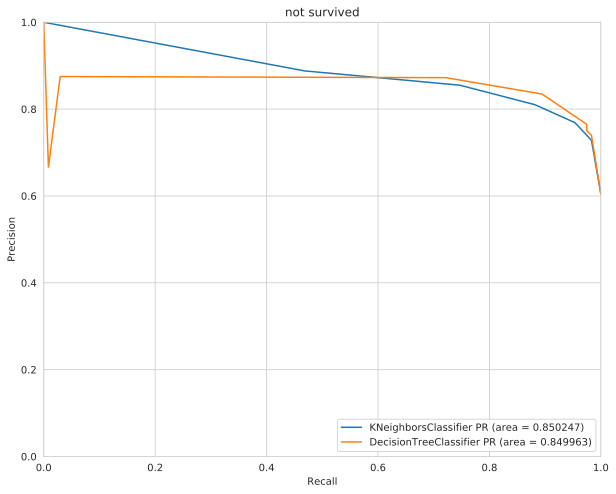

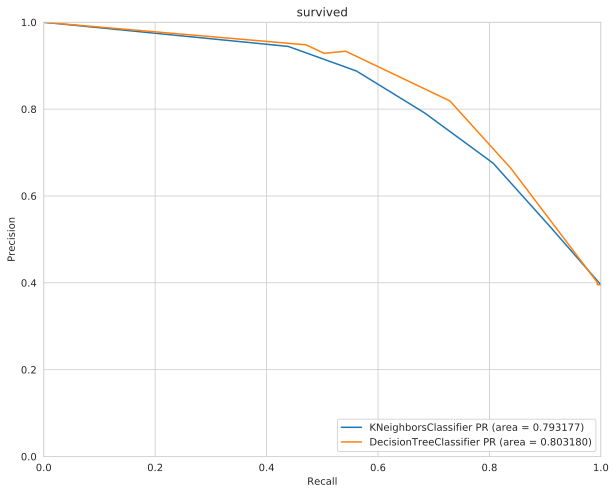

In [20]:
plt.figure(figsize=(10,8))
y_test_invers = []
for i, y in enumerate(y_test.reset_index(drop=True)):
    y_test_invers.append(1-y)
    
probas_knn0 = knn.fit(X_train, y_train).predict_proba (X_test)
probas_dtc0 = dtc.fit(X_train, y_train).predict_proba (X_test)
probas_knn1 = knn.fit(X_train, y_train).predict_proba (X_test)
probas_dtc1 = dtc.fit(X_train, y_train).predict_proba(X_test)
# K соседей
precision, recall, thresholds = precision_recall_curve(y_test_invers, probas_knn1[:,0])
aps_knn1 = average_precision_score(y_test_invers,probas_knn1[:,0])
plt.plot(recall, precision, label='%s PR (area = %f)' % ('KNeighborsClassifier', aps_knn1)) 
# решающее дерево
precision, recall, thresholds = precision_recall_curve(y_test_invers, probas_dtc1[:,0])
aps_dtc1 = average_precision_score(y_test_invers,probas_dtc1[:,0])
plt.plot(recall, precision, label='%s PR (area = %f)' % ('DecisionTreeClassifier',  aps_dtc1)) 
# вывод графика
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.legend(loc=4, fontsize='medium')
plt.title('not survived')
plt.show()


plt.figure(figsize=(10,8))
# K соседей
precision, recall, thresholds = precision_recall_curve(y_test, probas_knn0[:,1])
aps_knn0 = average_precision_score(y_test,probas_knn0[:,1])
plt.plot(recall, precision, label='%s PR (area = %f)' % ('KNeighborsClassifier', aps_knn0)) 
# решающее дерево
precision, recall, thresholds = precision_recall_curve(y_test, probas_dtc1[:,1])
aps_dtc1 = average_precision_score(y_test,probas_dtc1[:,1])
plt.plot(recall, precision, label='%s PR (area = %f)' % ('DecisionTreeClassifier',  aps_dtc1)) 
# вывод графика
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.legend(loc=4, fontsize='medium')
plt.title('survived')
plt.show()

# 9. Сравните кривые для классификаторов, указанных в задании, сделайте выводы

Классификаторы дерево принятия решений и k ближайших соседей имеют примерно одинаковые показатели качества относительно PR и ROC кривых. В целом, данные классификаторы правильно решают задачу предсказания класса с вероятностью 0.8~0.85, что не слишком точно, но и далеко от случайного - 0.5 (т.к. классов всего 2). Поэтому задача классификации была решена.